# COGS 118A- Project Checkpoint

EDIT: Fixed some grammatical errors according to the feedback from our TA and peers. Added the models that we will use inside the abstract section according to our TA's feedback.

## Names

- Tai Le
- Stefanie Dao
- Yepeng Li
- Cheng Chang
- Matthew Chong

## Abstract 
Identifying heart related issues is critical in the early stages of human life as taking steps to prevent this type of disease can save millions of lives. Our goal in this project is to predict whether or not a person is at risk to potentially encounter Heart Disease. This data represents critical factors regarding a person's health status such as cholesterol level and heart rate, as well as other detrimental health related activities such as smoking. Using this data we will perform exploratory data analysis to learn more about potential patterns of the dataset as well as perform feature extraction/selection accordingly. We will also apply various models such as decision Tree, K-Nearest-Neighborhood, Neural Network, and Logisitic Regression to determine which algorithm performs the best, and then use it to classify if an individual will potentially encounter some form of Heart Disease in the future. Within each classification algorithm we will first find the best settings to maximize performance and then each performance will be benchmarked against one another to find the best solution.

## Background

Heart disease also known as cardiovascular disease, is one of the main reason for the deaths of many indivduals around the world. Most noteably about 82% of deaths in low to middle income countries split relatively even between male and females<a name="hajar"></a>[<sup>[1]</sup>](#hist). Studies looking into the causes of heart disease has been excercised ever since the death of US President Franklin D. Roosevelt who was a victim to this, the lack of preparation to counter this disease proved our lack of knowledge towards it. Research into the causes of heart disease has been done within the town of Framingham where they found that vicitims commonly had a combination of high blood pressure, smoking, obesity and high blood cholesterol. It's emphasized that there is no sole reason for the cause of heart disease in addition to the above universally applying to other racial and ethnic groups. The Framingham organization in addition to Journal of the American Heart Association has also did a study on cardiovascular disease
where they found that hypertension is one of the primary risk factors which increase probability of stroke, coronary heart disease and heart failure<a name="vaugham"></a>[<sup>[2]</sup>](#hypertensions). The presence of hypertension was in 47.3% of adults in the US between 2015-2018 where ~80% of those individuals had uncontrolled hypertension and this in great risk of heart disease. 

Another study heart disease identification using machine learning algorithms is another example of previous research into this topic where they used ensemble of deep neural networks as a model to classify whether a patient is prone to have heart disease<a name="Tuli"></a>[<sup>[3]</sup>](#diseaseAlg). In this study they took the data from heart patients in the Cleaveland dataset and coresponded known output class in addition to trained model to predict results in real time. Training, validation and testing was split 70:10:20 where they used Nodes to represent their neural networks. This effective algorithm was validated for real-life heart patients were this experience yielded useful data for future investigations on this matter. Knowing this, looking into the causes of this disease is essential for the benefit of hummanity as it can save many lives, with integrating machine learning algorithms to identify heart disease in early stages can potentially prevent the death of others.

## Problem Statement 

Heart disease is hard to detect early on. Many times people do not know that they are in critical condition until they have a tachycardia or even stroke. Due to the shortage of doctors and limited availability of healthcare systems in certain areas of the world, it becomes a major problem in the medical field.

Our work aims to use machine learning methods to predict whether or not a patient would potentially have a heart disease based on their basic demographic information and medical history record. The early prognosis of heart disease can help in making decisions on lifestyle changes in high risk patients and reduce complications.

Our task is a classification task. This is a supervised machine learning techinique where class attributes are involved in the construction of the classifier and are used to classify or predict new information. Generally, for every patient, our model's prediction would be 1 if the patient would potentially have heart disease in 10 years and 0 otherwise. To generate such predictions, we will be using different classification models in machine learning such as Losgistic Regression, Decision Tree, K-Nearest Neigbor and Neural Networks. We will use several evaluation metrics including accuracy score, f1 score, and AUC-ROC curve to measure our model's performance.

## Data

### Dataset Introduction

- Our main dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). https://biolincc.nhlbi.nih.gov/studies/framcohort/. 
  - The dataset provides the patients’ information, which includes over 4,000 records and 15 attributes
  - Each observation consists of basic demographic and medical information of each patient
  - Some critical variables are 
    - Sex: male or female (Nominal)
    - Age: Age of the patient(Numerical)
    - Cigs Per Day: the number of cigarettes that the person smoked on average in one day(Numerical)
    - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    - Sys BP: systolic blood pressure (Numerical)
    - Dia BP: diastolic blood pressure (Numerical)
    - Heart Rate (Numerical)
    - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
  - From what we observed, we might need to encode nominal and binary data with one-hot encoding. Before training, we also need to normialize our data and find a way handle imbalanced data if later we discover that the data is highly imbalanced.

### Setup

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# For reproducibility
RAND_STATE = 42

### Data Cleaning

We first do some basic cleaning.

In [11]:
# Get data
data = pd.read_csv('data/CHD_preprocessed.csv')

# Renaming the column names
cols = ['male', 'age', 'education', 'smoker', 'cigs', 
        'bpmeds', 'stroke', 'hypertension', 'diabetes',
        'cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate',
        'glucose', 'chd']
data.columns = cols

data

male  age  education  smoker  cigs  bpmeds  stroke  hypertension  \
0        1   39          1       0   0.0     0.0       0             0   
1        0   46          0       0   0.0     0.0       0             0   
2        1   48          0       1  20.0     0.0       0             0   
3        0   61          1       1  30.0     0.0       0             1   
4        0   46          1       1  23.0     0.0       0             0   
...    ...  ...        ...     ...   ...     ...     ...           ...   
4128     1   50          0       1   1.0     0.0       0             1   
4129     1   51          1       1  43.0     0.0       0             0   
4130     0   48          0       1  20.0     0.0       0             0   
4131     0   44          0       1  15.0     0.0       0             0   
4132     0   52          0       0   0.0     0.0       0             0   

      diabetes  cholesterol  sysbp  diabp    bmi  heartrate  glucose  chd  
0            0        195.0  106.0   70.0  26.97       80.0     77.0    0  
1            0        250.0  121.0   81.0  28.73       95.0     76.0    0  
2            0        245.0  127.5   80.0  25.34       75.0     70.0    0  
3            0        225.0  150.0   95.0  28.58       65.0    103.0    1  
4            0        285.0  130.0   84.0  23.10       85.0     85.0    0  
...        ...          ...    ...    ...    ...        ...      ...  ...  
4128         0        313.0  179.0   92.0  25.97       66.0     86.0    1  
4129         0        207.0  126.5   80.0  19.71       65.0     68.0    0  
4130         0        248.0  131.0   72.0  22.00       84.0     86.0    0  
4131         0        210.0  126.5   87.0  19.16       86.0     82.0    0  
4132         0        269.0  133.5   83.0  21.47       80.0    107.0    0  

[4133 rows x 16 columns]

Since the dataset is already cleaned and properly coded, we will not perform any further cleaning.

### Exploratory Data Analysis (EDA)

Below is the general statistics of this dataset.

In [12]:
data.describe()

male          age    education       smoker         cigs  \
count  4133.000000  4133.000000  4133.000000  4133.000000  4133.000000   
mean      0.427293    49.557222     0.280668     0.494798     9.101621   
std       0.494745     8.561628     0.449380     0.500033    11.918440   
min       0.000000    32.000000     0.000000     0.000000     0.000000   
25%       0.000000    42.000000     0.000000     0.000000     0.000000   
50%       0.000000    49.000000     0.000000     0.000000     0.000000   
75%       1.000000    56.000000     1.000000     1.000000    20.000000   
max       1.000000    70.000000     1.000000     1.000000    70.000000   

            bpmeds       stroke  hypertension     diabetes  cholesterol  \
count  4133.000000  4133.000000   4133.000000  4133.000000  4133.000000   
mean      0.034358     0.006049      0.311154     0.025647   236.664408   
std       0.182168     0.077548      0.463022     0.158100    43.909188   
min       0.000000     0.000000      0.000000     0.000000   107.000000   
25%       0.000000     0.000000      0.000000     0.000000   206.000000   
50%       0.000000     0.000000      0.000000     0.000000   234.000000   
75%       0.000000     0.000000      1.000000     0.000000   262.000000   
max       1.000000     1.000000      1.000000     1.000000   600.000000   

             sysbp        diabp          bmi    heartrate      glucose  \
count  4133.000000  4133.000000  4133.000000  4133.000000  4133.000000   
mean    132.367046    82.872248    25.778571    75.925236    81.946528   
std      22.080332    11.952654     4.074360    12.049188    22.860954   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.060000    68.000000    72.000000   
50%     128.000000    82.000000    25.380000    75.000000    80.000000   
75%     144.000000    89.500000    27.990000    83.000000    85.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

               chd  
count  4133.000000  
mean      0.151948  
std       0.359014  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Let's look at the statistics of individual classes:

In [13]:
positive = data[data['chd'] == 1]
negative = data[data['chd'] == 0]

In [14]:
positive.describe()

male         age   education      smoker        cigs      bpmeds  \
count  628.000000  628.000000  628.000000  628.000000  628.000000  628.000000   
mean     0.525478   54.173567    0.251592    0.514331   10.581210    0.074841   
std      0.499749    8.008178    0.434274    0.500193   12.961165    0.263344   
min      0.000000   35.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   48.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000   55.000000    0.000000    1.000000    2.000000    0.000000   
75%      1.000000   61.000000    1.000000    1.000000   20.000000    0.000000   
max      1.000000   70.000000    1.000000    1.000000   60.000000    1.000000   

           stroke  hypertension    diabetes  cholesterol       sysbp  \
count  628.000000    628.000000  628.000000   628.000000  628.000000   
mean     0.017516      0.507962    0.062102   245.307325  143.774682   
std      0.131288      0.500335    0.241533    47.873133   26.851766   
min      0.000000      0.000000    0.000000   107.000000   83.500000   
25%      0.000000      0.000000    0.000000   214.000000  125.000000   
50%      0.000000      1.000000    0.000000   241.000000  139.000000   
75%      0.000000      1.000000    0.000000   271.000000  158.000000   
max      1.000000      1.000000    1.000000   600.000000  295.000000   

            diabp         bmi   heartrate     glucose    chd  
count  628.000000  628.000000  628.000000  628.000000  628.0  
mean    86.995223   26.472812   76.507962   88.345541    1.0  
std     14.137369    4.454779   12.231614   39.501560    0.0  
min     48.000000   15.960000   50.000000   40.000000    1.0  
25%     78.000000   23.580000   68.000000   73.000000    1.0  
50%     85.000000   26.050000   75.000000   80.000000    1.0  
75%     95.000000   28.852500   84.250000   88.250000    1.0  
max    140.000000   56.800000  120.000000  394.000000    1.0

In [15]:
negative.describe()

male          age    education       smoker         cigs  \
count  3505.000000  3505.000000  3505.000000  3505.000000  3505.000000   
mean      0.409700    48.730100     0.285877     0.491298     8.836519   
std       0.491849     8.394026     0.451896     0.499996    11.704058   
min       0.000000    32.000000     0.000000     0.000000     0.000000   
25%       0.000000    42.000000     0.000000     0.000000     0.000000   
50%       0.000000    48.000000     0.000000     0.000000     0.000000   
75%       1.000000    55.000000     1.000000     1.000000    20.000000   
max       1.000000    70.000000     1.000000     1.000000    70.000000   

            bpmeds       stroke  hypertension     diabetes  cholesterol  \
count  3505.000000  3505.000000   3505.000000  3505.000000  3505.000000   
mean      0.027104     0.003994      0.275892     0.019116   235.115835   
std       0.162410     0.063083      0.447026     0.136951    42.984636   
min       0.000000     0.000000      0.000000     0.000000   113.000000   
25%       0.000000     0.000000      0.000000     0.000000   205.000000   
50%       0.000000     0.000000      0.000000     0.000000   233.000000   
75%       0.000000     0.000000      1.000000     0.000000   261.000000   
max       1.000000     1.000000      1.000000     1.000000   453.000000   

             sysbp        diabp          bmi    heartrate      glucose     chd  
count  3505.000000  3505.000000  3505.000000  3505.000000  3505.000000  3505.0  
mean    130.323110    82.133524    25.654182    75.820827    80.800000     0.0  
std      20.454837    11.362873     3.990325    12.014991    18.122512     0.0  
min      83.500000    50.000000    15.540000    44.000000    40.000000     0.0  
25%     116.000000    74.000000    22.980000    68.000000    72.000000     0.0  
50%     127.000000    81.000000    25.230000    75.000000    79.000000     0.0  
75%     141.000000    88.000000    27.830000    83.000000    85.000000     0.0  
max     243.000000   142.500000    51.280000   143.000000   386.000000     0.0

This provides us a general feel of the relationship between the classes. From the above statistics, we can see that the positive class on average has a higher heart rate, cigaretts smoke, glucose, and cholesterol level. However, we need to also keep in mind the count of each class (this dataset is not balanced), which will be discussed later.

Using the above statistics, we will visualize some of the variables with respect to CHD (Corollary Heart Disease class).

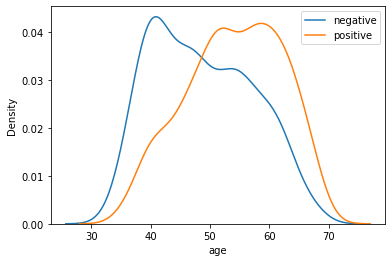

In [16]:
ax = sns.kdeplot(data['age'][data['chd'] == 0].sample(n=500), label='negative')
ax = sns.kdeplot(data['age'][data['chd'] == 1].sample(n=500), label='positive')
ax.legend()

This shows how age might play a role in the classification since the distribution of age for the positive class is denser towards the older age.

Next, we will look at the relationship between prevalent hypertension and our target classification variable (CHD).

In [17]:
# Creating a dataframe containing hypertension count for each class
hyp_chd_0 = data['hypertension'][data['chd'] == 0]
hyp_chd_1 = data['hypertension'][data['chd'] == 1]
hyp_chd = np.array([[0, hyp_chd_0.sum(), len(hyp_chd_0) - hyp_chd_0.sum()],
                    [1, hyp_chd_1.sum(), len(hyp_chd_1) - hyp_chd_1.sum()]])

hyp_chd = pd.DataFrame(hyp_chd, columns=['chd_class', 'hypertension', 'no hypertension'])
hyp_chd

chd_class  hypertension  no hypertension
0          0           967             2538
1          1           319              309

<AxesSubplot:xlabel='chd_class'>

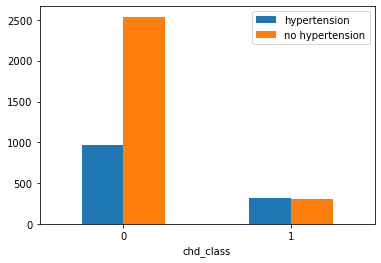

In [18]:
hyp_chd.plot(x='chd_class', y=['hypertension', 'no hypertension'], kind='bar', rot=0)

From the above plot, we can see that there are a lot more people with no prevalent hypertension for the negative class. As seen in the statistics table, the proportion of people in the positive class with prevalent hypertension is generally higher. However, this is by looking at the entire dataset, which is unbalanced. We will sample 500 from each class and replot the statistics below:

In [19]:
hyp_chd_0 = data['hypertension'][data['chd'] == 0].sample(n=500)
hyp_chd_1 = data['hypertension'][data['chd'] == 1].sample(n=500)

hyp_chd500 = np.array([[0, hyp_chd_0.sum(), len(hyp_chd_0) - hyp_chd_0.sum()],
                       [1, hyp_chd_1.sum(), len(hyp_chd_1) - hyp_chd_1.sum()]])

hyp_chd500 = pd.DataFrame(hyp_chd500, columns=['chd_class', 'hypertension', 'no hypertension'])
hyp_chd500

chd_class  hypertension  no hypertension
0          0           152              348
1          1           252              248

<AxesSubplot:xlabel='chd_class'>

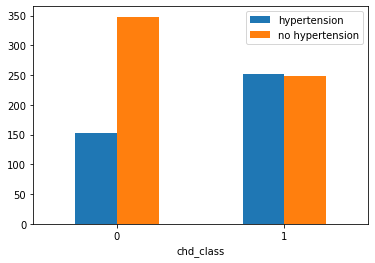

In [20]:
hyp_chd500.plot(x='chd_class', y=['hypertension', 'no hypertension'], kind='bar', rot=0)

Here, we again see the pattern where there are more people with no prevalent hypertension in the negative class. Even though this is more balanced in terms of the amount of data points of each class, it might still be too small of a sample. Thus, we need to keep in mind this small sample size when infering the result above.

Let's make some quick visualizations of a few variables:

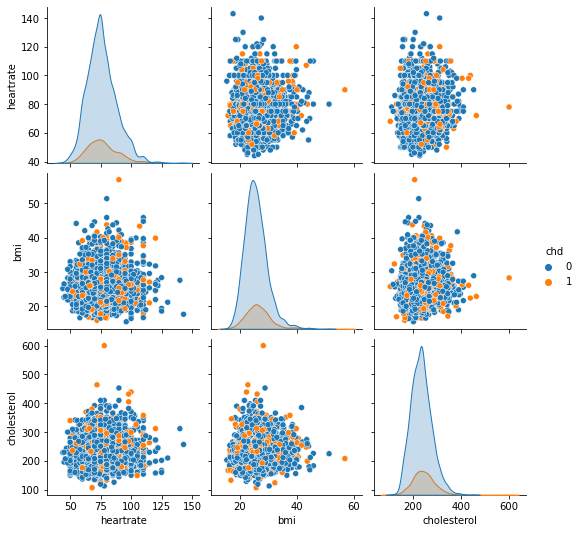

In [21]:
d1 = data[['heartrate', 'bmi', 'cholesterol', 'chd']]

sns.pairplot(d1, hue='chd')

From the above pairplot, we can see how the height of the distributions of heart rate, BMI, and cholesterol level is generally shorter for people with 10-year risk of corollary heart disease. However, there might be some external factors that contributed to the difference in those distributions. Let's first look at the mean from each class:

In [22]:
print("Mean heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].mean())
print("Mean heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].mean())

print("Max heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].max())
print("Max heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].max())

print("Median heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].median())
print("Median heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].median())

Mean heart rate for negative class:  75.82082738944365
Mean heart rate for positive class:  76.50796178343948
Max heart rate for negative class:  143.0
Max heart rate for positive class:  120.0
Median heart rate for negative class:  75.0
Median heart rate for positive class:  75.0


We can see that the statistics of both classes are very similar. Thus, the difference in distributions can be explained by the density of each class given that we saw how there are way more people in the negative class. In other words, the taller density distribution of the negative class around the mean simply means that there are more data points of that class.

Let's quickly look at the distribution of the classes:

<AxesSubplot:>

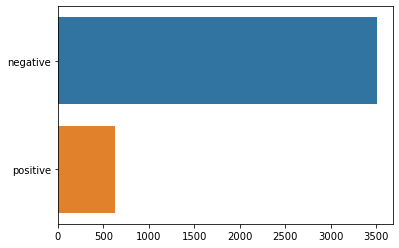

In [23]:
sns.barplot(x=data['chd'].value_counts().values, y=['negative', 'positive'], orient='h')

We can see that the distribution of classes is heavily uneven and there are way more negative than positive classes.

Now, let us sample 500 data points from each class and re-plot the pairplot:

In [24]:
negative_indices = np.array(d1['chd'][d1['chd'] == 0].sample(n=500).index)
positive_indices = np.array(d1['chd'][d1['chd'] == 1].sample(n=500).index)
indices = np.append(negative_indices, positive_indices)
d2 = data[['heartrate', 'bmi', 'cholesterol', 'chd']].to_numpy()[indices]

In [25]:
d2.shape

(1000, 4)

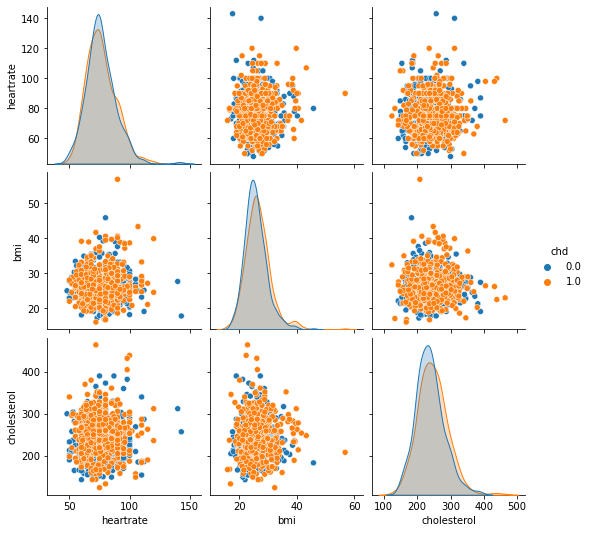

In [26]:
d2 = pd.DataFrame(d2, columns=['heartrate', 'bmi', 'cholesterol', 'chd'])

sns.pairplot(d2, hue='chd')

Here, we can see that the density distributions of both classes are very similar which matches our expectation using the statistics earlier. However, this doesn't tell us anything useful since the distributions are similar and there is little to no correlation between the variables. Let's add a few more variables.

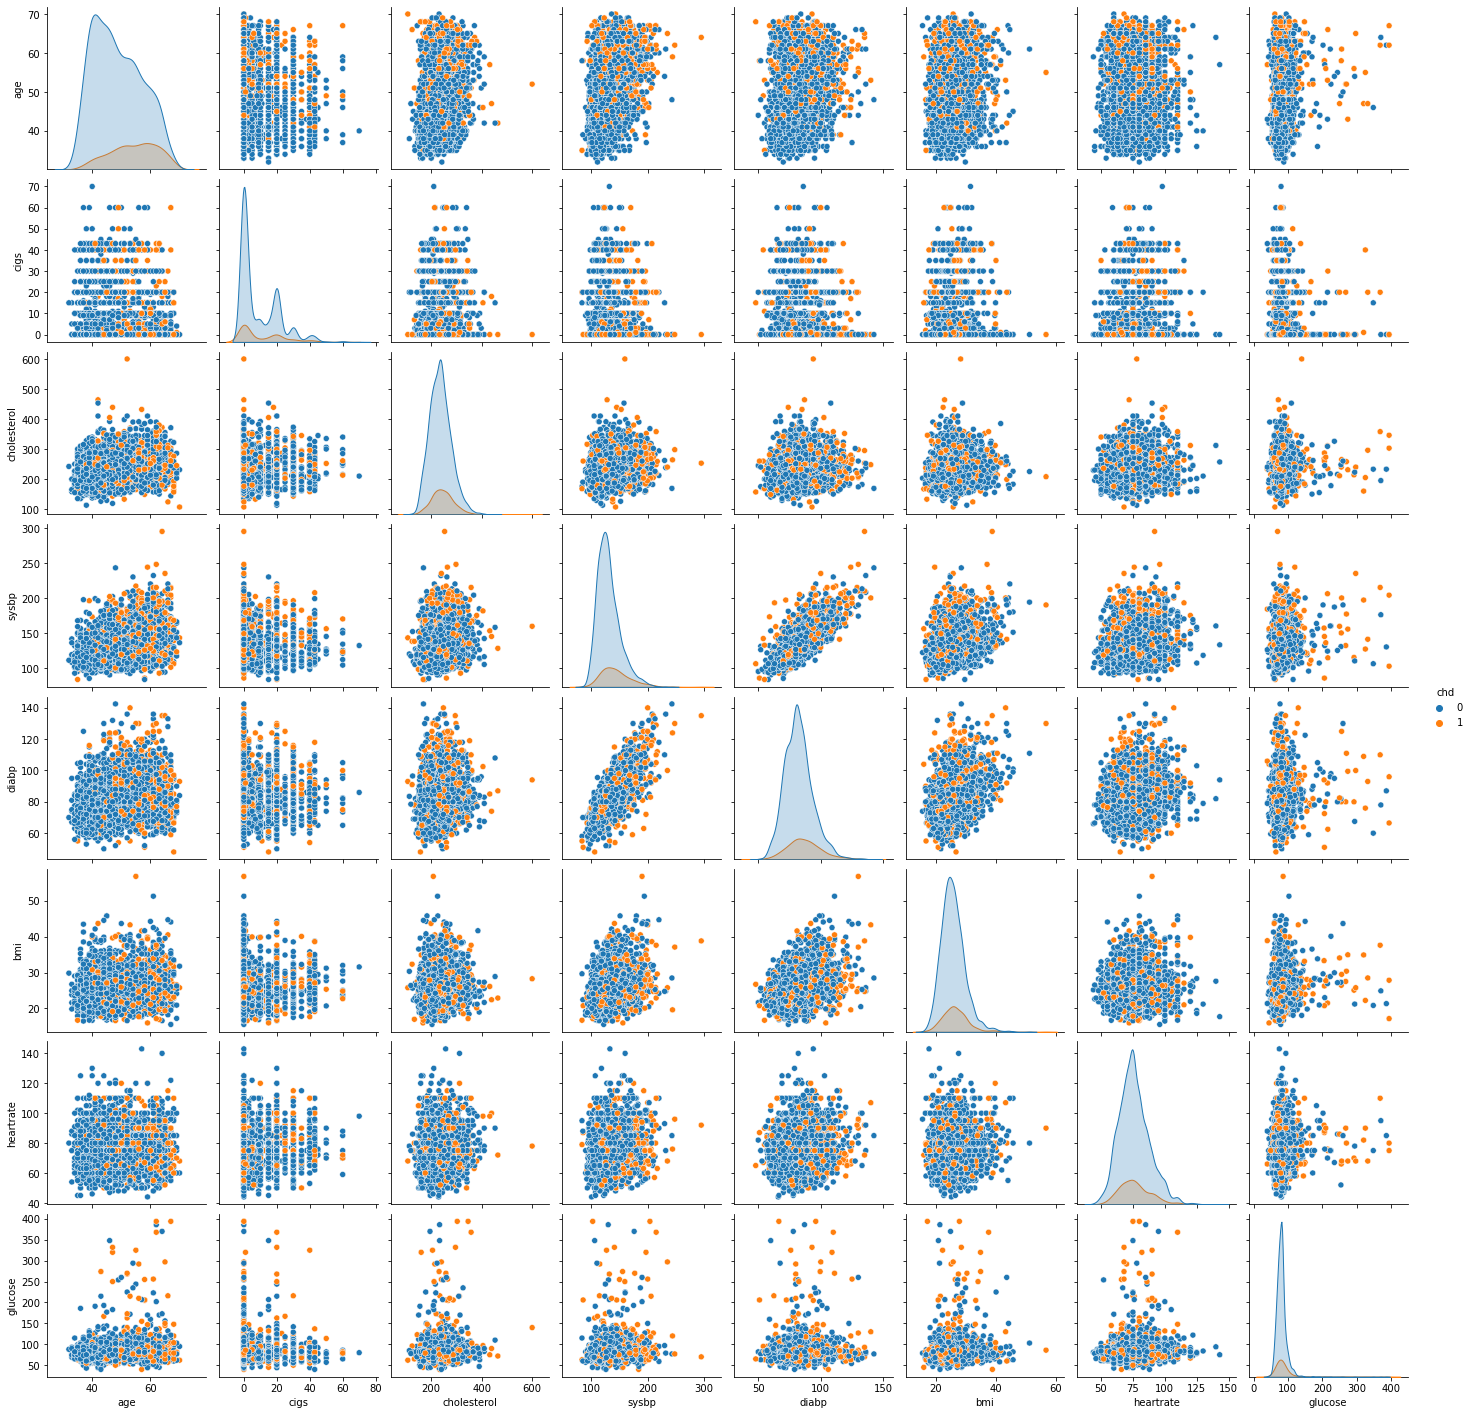

In [27]:
d3 = data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose', 'chd']]

sns.pairplot(d3, hue='chd')

By just eyeballing the plots, we can see that there might be some positive correlation between systolic blood pressure (sysbp) and diastolic blood pressure (diabp). Let's get the correlation coefficient for each variable:

In [28]:
d3.corr()

age      cigs  cholesterol     sysbp     diabp       bmi  \
age          1.000000 -0.192079     0.266915  0.394675  0.209126  0.135138   
cigs        -0.192079  1.000000    -0.024522 -0.089390 -0.055252 -0.088904   
cholesterol  0.266915 -0.024522     1.000000  0.210655  0.168231  0.115800   
sysbp        0.394675 -0.089390     0.210655  1.000000  0.784691  0.324970   
diabp        0.209126 -0.055252     0.168231  0.784691  1.000000  0.377639   
bmi          0.135138 -0.088904     0.115800  0.324970  0.377639  1.000000   
heartrate   -0.008788  0.072660     0.089570  0.186476  0.185271  0.070467   
glucose      0.116543 -0.054101     0.047502  0.136629  0.060629  0.078100   
chd          0.228260  0.052555     0.083328  0.218715  0.146028  0.072134   

             heartrate   glucose       chd  
age          -0.008788  0.116543  0.228260  
cigs          0.072660 -0.054101  0.052555  
cholesterol   0.089570  0.047502  0.083328  
sysbp         0.186476  0.136629  0.218715  
diabp         0.185271  0.060629  0.146028  
bmi           0.070467  0.078100  0.072134  
heartrate     1.000000  0.087127  0.020474  
glucose       0.087127  1.000000  0.118497  
chd           0.020474  0.118497  1.000000

There is indeed a positive correlation between sysbp and diabp. However, upon looking at their definitions, they seem to be measuring blood presure at different states of the heart (beating and resting). Thus, further research is necessary to determine the significance of this correlation.

For the rest of this EDA, we will try to transform the data using $log_{10}$ scale and sklearn normalization using $L_2$ norm to see if there are any other significant findings.

/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


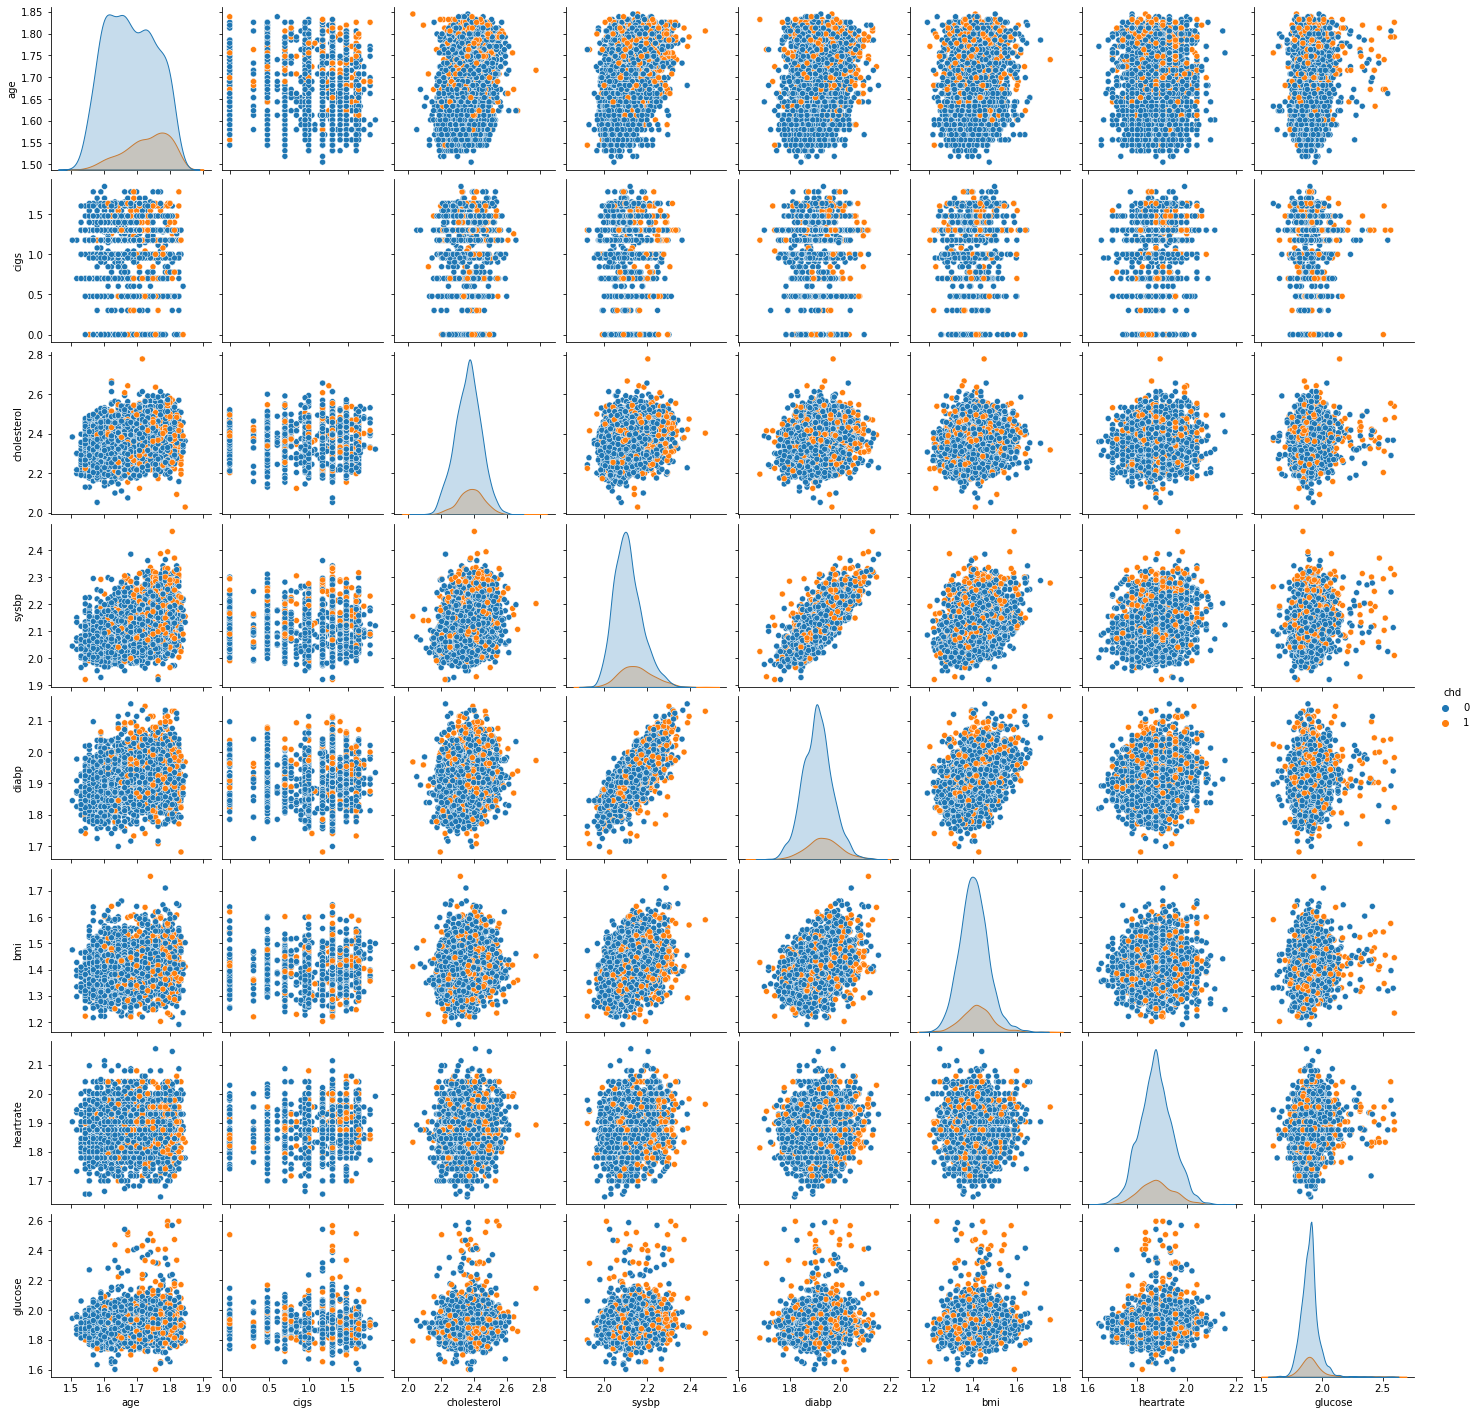

In [29]:
# Transform using log base 10
d4 = np.log10(data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']])
d4['chd'] = data['chd']

sns.pairplot(d4, hue='chd')

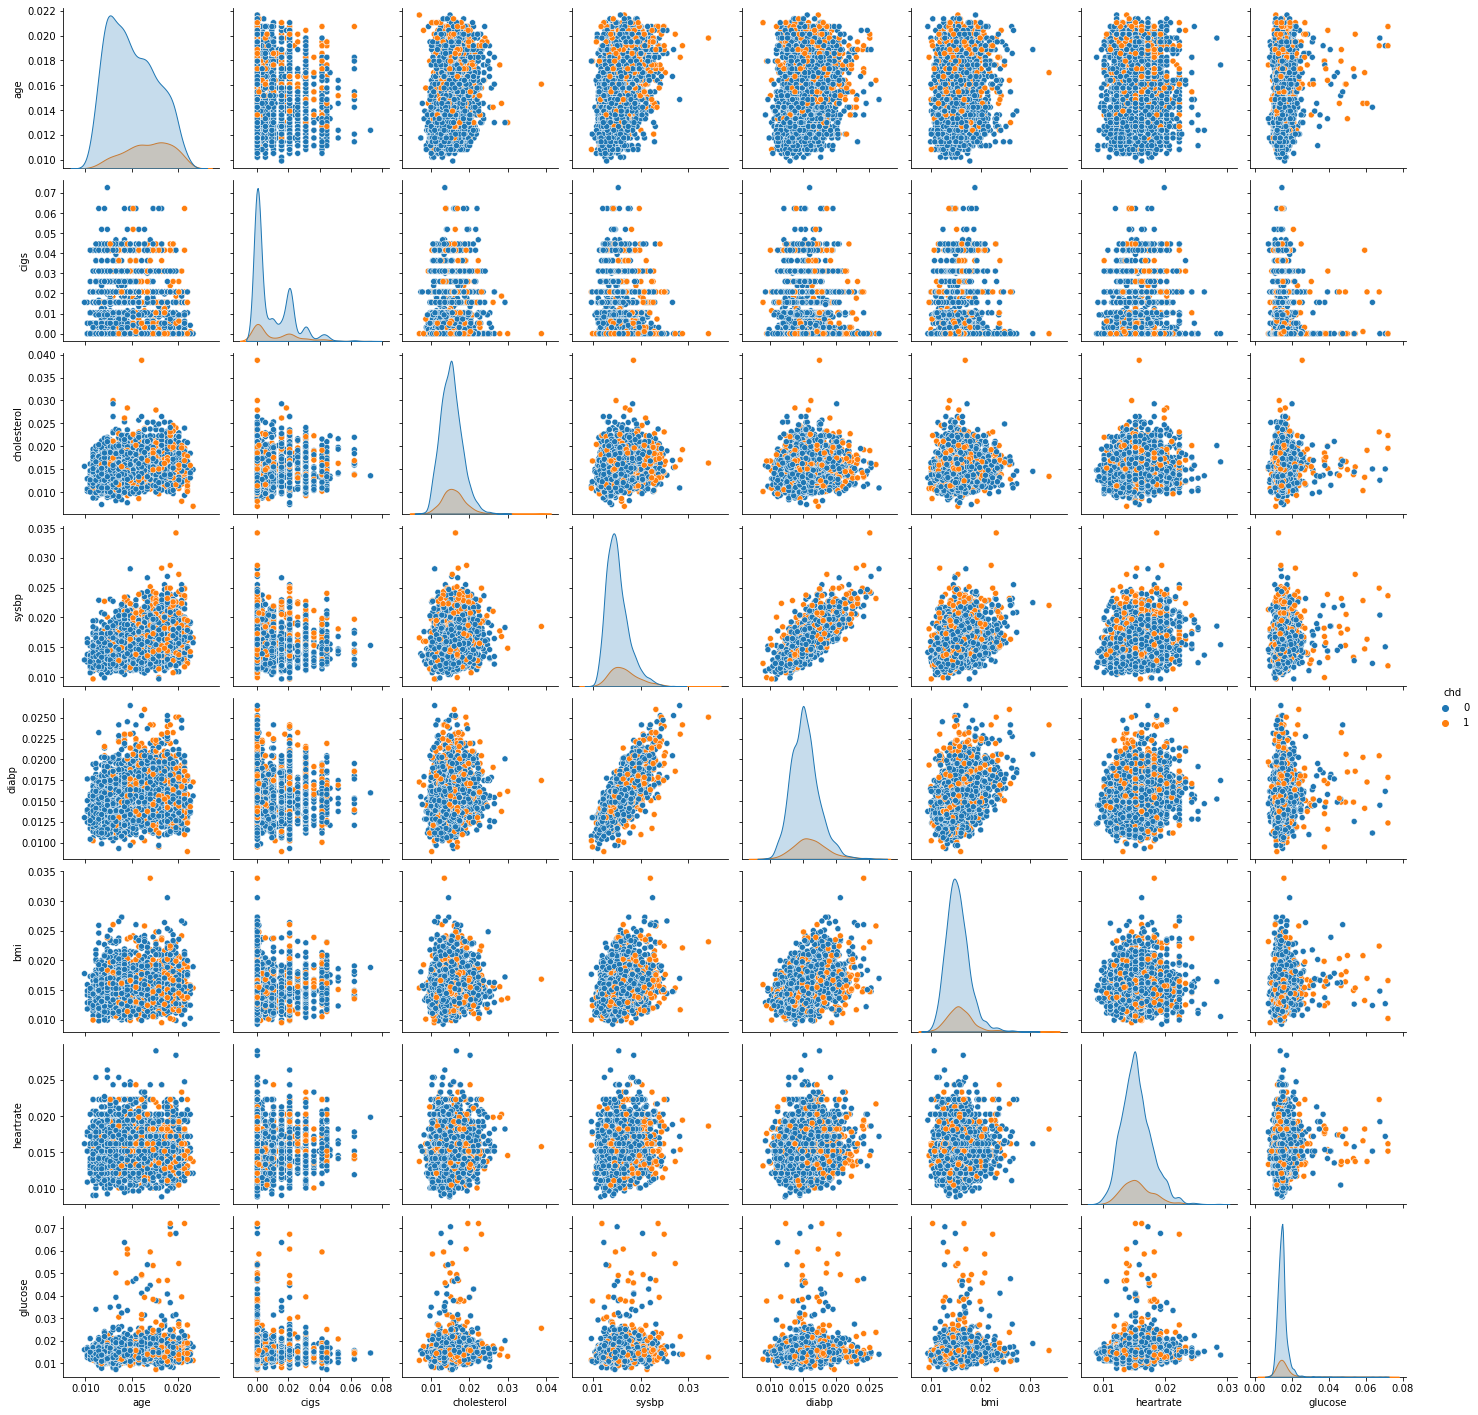

In [30]:
# Normalizing the data using L2
d5 = data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']].to_numpy()
d5 = normalize(d5, axis=0)
d5 = pd.DataFrame(data=d5, columns=['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose'])
d5['chd'] = data['chd']

sns.pairplot(d5, hue='chd')

In [31]:
d4.corr()

age      cigs  cholesterol     sysbp     diabp       bmi  \
age          1.000000 -0.084216     0.285646  0.396240  0.215856  0.139750   
cigs        -0.084216  1.000000     0.013672 -0.004587  0.029434  0.034123   
cholesterol  0.285646  0.013672     1.000000  0.219325  0.179350  0.132651   
sysbp        0.396240 -0.004587     0.219325  1.000000  0.782022  0.327357   
diabp        0.215856  0.029434     0.179350  0.782022  1.000000  0.374752   
bmi          0.139750  0.034123     0.132651  0.327357  0.374752  1.000000   
heartrate   -0.009224  0.066644     0.091483  0.183917  0.182243  0.063450   
glucose      0.121873 -0.052473     0.044668  0.133952  0.058790  0.084324   
chd          0.226104  0.079913     0.079590  0.212430  0.136889  0.069743   

             heartrate   glucose       chd  
age          -0.009224  0.121873  0.226104  
cigs          0.066644 -0.052473  0.079913  
cholesterol   0.091483  0.044668  0.079590  
sysbp         0.183917  0.133952  0.212430  
diabp         0.182243  0.058790  0.136889  
bmi           0.063450  0.084324  0.069743  
heartrate     1.000000  0.099506  0.020508  
glucose       0.099506  1.000000  0.100001  
chd           0.020508  0.100001  1.000000

In [32]:
d5.corr()

age      cigs  cholesterol     sysbp     diabp       bmi  \
age          1.000000 -0.192079     0.266915  0.394675  0.209126  0.135138   
cigs        -0.192079  1.000000    -0.024522 -0.089390 -0.055252 -0.088904   
cholesterol  0.266915 -0.024522     1.000000  0.210655  0.168231  0.115800   
sysbp        0.394675 -0.089390     0.210655  1.000000  0.784691  0.324970   
diabp        0.209126 -0.055252     0.168231  0.784691  1.000000  0.377639   
bmi          0.135138 -0.088904     0.115800  0.324970  0.377639  1.000000   
heartrate   -0.008788  0.072660     0.089570  0.186476  0.185271  0.070467   
glucose      0.116543 -0.054101     0.047502  0.136629  0.060629  0.078100   
chd          0.228260  0.052555     0.083328  0.218715  0.146028  0.072134   

             heartrate   glucose       chd  
age          -0.008788  0.116543  0.228260  
cigs          0.072660 -0.054101  0.052555  
cholesterol   0.089570  0.047502  0.083328  
sysbp         0.186476  0.136629  0.218715  
diabp         0.185271  0.060629  0.146028  
bmi           0.070467  0.078100  0.072134  
heartrate     1.000000  0.087127  0.020474  
glucose       0.087127  1.000000  0.118497  
chd           0.020474  0.118497  1.000000

The results are similar to the data prior to transformation and there are no new patterns.

## Proposed Solution 

In order to achieve the best possible solution for our problem, we will first perform an algorithm selection process where we will be applying different classification algorithms and benchmarking their performance against one another. The performance of these algorithms will indicate whether one of them is appropriate to use as our solution. Below are the models that we will be using:

- Benchmark model: Logistic Regression 
  - This algorithm classifies the two classes using a logistic function and a linear decision boundary. The logistic function (or sigmoid): $$\sigma(k) = \frac{1}{1+e^{-k}}$$ turns a predicted value into a probability value that indicates how likely it is for that prediction to belong to a certain class. The input value $k$ is the predicted value using the linear function $\textbf{w}^T\textbf{x+b}$ that defines the decision boundary. The optimal $\textbf{w}$ for our linear decision boundary can be found by minimizing the appropriate loss function for logistic regression.
  
- Model 1: Decision Tree
  - This algorithm classifies the labels by recursively building a decision tree. The branches are split based on the amount of information gain from each scenario, and our goal is to maximize the information gain from each split. Below is the mathematical expression of the information maximization: $$argmax_B G(S,B) = H(S) - \sum_{i=1}^t \frac{|S_i|}{|S|} H(S_i)$$ where $B$ is the configuration that splits the data points, $S$ is the data points setting of current split, each $S_i$ belongs to the data points setting of a branch $i$, and $H(S)$ determines the uncertainty/information of $S$. We will be using sklearn for this algorithm.

- Model 2: k-Nearest-Neighborhood
  - This algorithm classifies the data points by first calculating the distance between the input data point and the trained data points. Then, it will select the nearest $k$ (odd) neighbors for majority voting. The new data point is then classified as the label that won the voting.
  
- Model 3: Neural Network
  - Neural Networks are modeled as collections of neurons that are connected in an acyclic graph. In other words, the outputs of some neurons can become inputs to other neurons. Neural Network models are often organized into distinct layers of neurons. In our work, we will be using a simple feed-forward multi-layer network.
  

For all of these algorithms, we will run them separately and benchmark each of their performance against our baseline to find out which is the most appropriate algorithm that we should use to solve our problem. For each of these, we will perforem several  metrics (described in below section) to evaluate the performance of our models. The algorithm with the best performance will be our solution.

## Evaluation Metrics 

To quantify the performance of our models, we will is 3 evaluation metrics including Accuracy, AUC-ROC and F1 score.



*   As our main task is to do classification, we want to we want the predicted probability $p_\theta(y_i = 1|x_i)$ to be as close as possible to the label $y_i$. In other words, we want to maximize the model's accuracy, which measures how many observations, both positive and negative, were correctly classified. 
$$ accuracy(y, f_\theta(X)) = \frac{1}{|y|} \sum^{|y|}_{i= 1} \omega
(f_0(x_i) = y_i)$$
where $\omega$ is an indicator function, and $f_\theta(x_i)$ is the binarized output of the mode \\

* With highly imbalanced dataset however, relying on the model's accuracy alone would not yield a good prediction. Therefore, we can use an additional measure called $F_1$ score to balance precision (i.e the rate that items predicted to have a positive label by the classifier are in fact labeled positively) and recall (i.e  the rate that all positively-labeled items our classifier predicted as having a positive label). Formally, we'll have:
$$F_\beta = (1+\beta^2) \frac{precision \times recall}{\beta^2 precision + recall}$$
Here we are choosing $\beta = 1$ because we care equally about precision and recall. 

* Additionally, not only do we care about the prediction label but also how much the model is capable of distinguishing between classes. Therefore, we can use the AUC (Area Under The Curve) - ROC (Receiver Operating Characteristics) curve to as performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
The higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The curve is plotted with TPR (True Positive Rate, or Precision) against the FPR (False Positive Rate, which is just calculated as 1 - TPR) where TPR is on the y-axis and FPR is on the x-axis.


> 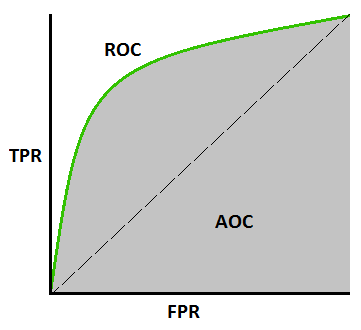

## Preliminary results

We should try models that are used for supervised binary classification tasks. Specifically, it would be interesting to test out models such as some kind of decision trees, support vector machine, logistic regression, and K-nearest neightbors. However, KNN here might not be an optimal solution to the problem due to the relatively high dimensionality our original data has. Therefore, we may need to use models that are less susceptible to the "curse of dimensionality".

### Preprocessing

We first take out the feature (chd) to be classified and do the train-test split. Because the distribution between class 0 and 1 is uneven, we need to use a stratified split.

In [33]:
X = data.drop("chd", axis=1)
y = np.array(data["chd"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RAND_STATE, 
                                                    stratify=y)
# Check stratify result
print("training split class 1 ratio", 
      sum(y_train) / len(y_train))
print("testing split class 1 ratio", 
      sum(y_test) / len(y_test))

training split class 1 ratio 0.15184513006654568
testing split class 1 ratio 0.1523579201934704


### Feature Selection

As we can see in the EDA section, there are many features presented in this data that does seem to have a significantly different distrbution between the two groups that we want to classify. Therefore, we want to try some feature selection techniques over this data before selecting the appropiate classification model.

We try an L1-based feature selection first. This selection technique directly removes features that does not provide a significant conitrbution to the classification power of the naive model (logistic regression) that we are using.

In [34]:
# Check different regularization strength
reg_strength_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

# Fit a logistic regression model with these different strength, 
# get average CV scores from each of them
avg_cv_score_list = []
for reg_strength in reg_strength_list:
    lr = LogisticRegression(penalty="l1", C=reg_strength, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_c = reg_strength_list[best_reg_idx]

# Use the best C to fit model and select features, make new feature array 
# with only those features
lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
selector = SelectFromModel(estimator=lr).fit(X_train, y_train)
X_train_l1 = selector.transform(X_train)

print("Before selection", X_train.shape)
print("After selection", X_train_l1.shape)

Before selection (3306, 15)
After selection (3306, 15)


In [35]:
best_c

10

Surprisingly, L1 feature selection result suggests that all features should be kept for the approximated best performance of a logistic regression.

Now we use pricipal component analysis (PCA) to make another attempt at model selection, and see what PCA would tell us to do.

In [36]:
keep_dim_list = [8, 9, 10, 11, 12, 13, 14, 15]

avg_cv_score_list = []
for keep_dim in keep_dim_list:
    pca = PCA(n_components=keep_dim, random_state=RAND_STATE)
    X_train_new = pca.fit_transform(X_train)
    lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train_new, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_keep_dim = keep_dim_list[best_reg_idx]

print("The best number of dimensions to keep:", best_keep_dim)

The best number of dimensions to keep: 15


It appears that PCA agrees with the L1 feature selection result; we should use all features in this dataset, at least for logistic regressions.

### Baseline Models

Our base line model is the simple logistic regression

In [37]:
lg_base_mod = LogisticRegression()
lg_base_mod.fit(X_train,y_train)
lg_base_mod.score(X_train,y_train)

/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8517846339987901

Such a simple regression may not satisfy our needs, so we would need some modifications on that.

In [38]:
import matplotlib as plt

/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means 

<AxesSubplot:xlabel='index', ylabel='difference'>

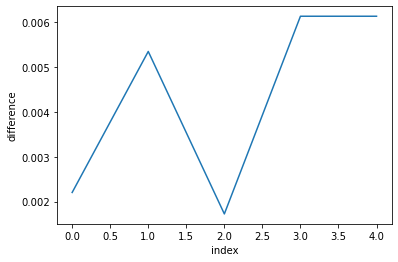

In [39]:
train_scores = []
test_scores =[]
for i in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    log_mod = LogisticRegression(solver = i)
    log_mod.fit(X_train,y_train)
    train_scores.append(log_mod.score(X_train,y_train))
    test_scores.append(log_mod.score(X_test,y_test))
result = pd.DataFrame({'tr':train_scores,'te':test_scores,'difference':[abs(train_scores[i]-test_scores[i]) for i in range(len(train_scores))]})
result = result.reset_index()
sns.lineplot(x = 'index',y ='difference',data= result)

<AxesSubplot:>

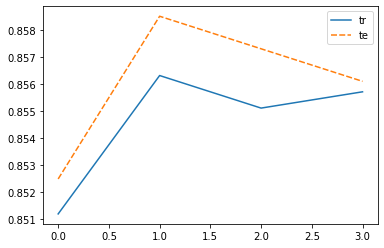

In [40]:
train_scores = []
test_scores =[]
for i in [0.0001, 0.1, 1, 10]:
    log_mod = LogisticRegression(C= i,solver= 'newton-cg')
    log_mod.fit(X_train,y_train)
    train_scores.append(log_mod.score(X_train,y_train))
    test_scores.append(log_mod.score(X_test,y_test))
result = pd.DataFrame({'tr':train_scores,'te':test_scores})
sns.lineplot(data= result)

Area under the Receiver Operating Characteristic curve: 0.7332835178769559


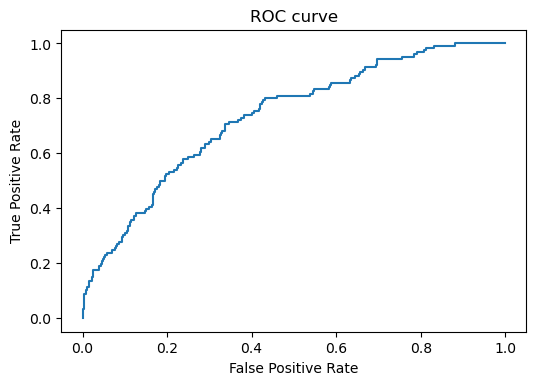

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
final_log_mod = LogisticRegression(C = 10,solver = 'newton-cg')
final_log_mod.fit(X_train,y_train)
p = final_log_mod.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, p[:,1])
# Your Code Here
fpr = fpr # false positive rate
tpr = tpr  # true positive rate


# YOUR CODE HERE
roc_auc = roc_auc_score(y_test, p[:, 1])
# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

In [109]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

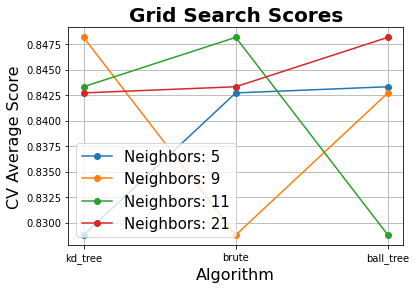

In [112]:
from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd_tree','brute', 'ball_tree'], 'n_neighbors':[5,9,11,21]}    
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)
grid.fit(X_train, y_train)

# Source: Sklearn documentation
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid.cv_results_, ['kd_tree','brute', 'ball_tree'],[5,9,11,21], 'Algorithm', 'Neighbors')

In [113]:
# Source: Sklearn documentation
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html 
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/Users/stefaniedao/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

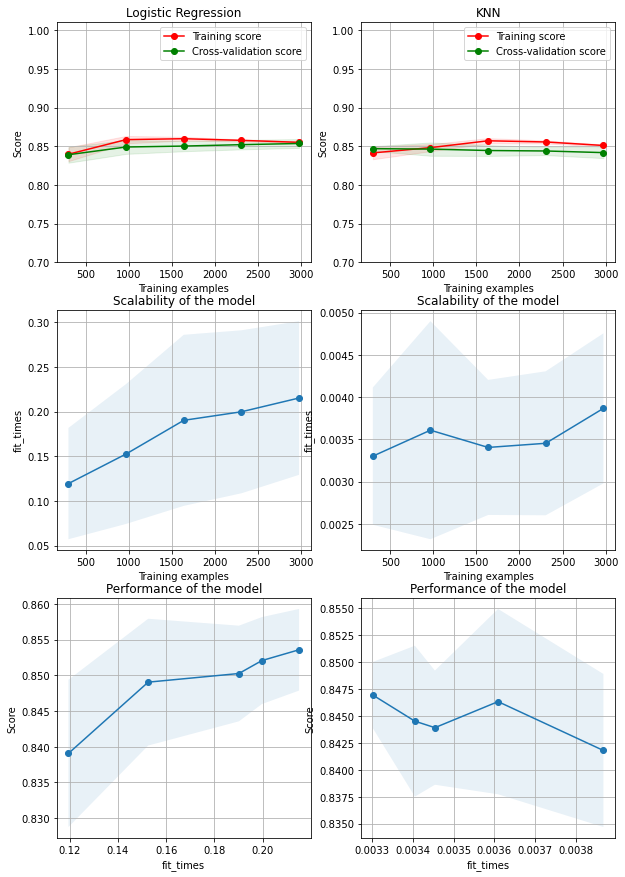

In [117]:
cv = StratifiedKFold(n_splits=10, random_state=747, shuffle=True)
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=11)
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
plot_learning_curve(
    final_log_mod, 'Logistic Regression', X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plot_learning_curve(
    knn, 'KNN', X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

In [118]:
knn.fit(X_train, y_train)

knn_prob = knn.predict_proba(X_test)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[694   7]
 [117   9]]


Accuracy of K-NeighborsClassifier: 85.00604594921403 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       701
           1       0.56      0.07      0.13       126

    accuracy                           0.85       827
   macro avg       0.71      0.53      0.52       827
weighted avg       0.81      0.85      0.80       827



Area under the Receiver Operating Characteristic curve: 0.6450422299209746


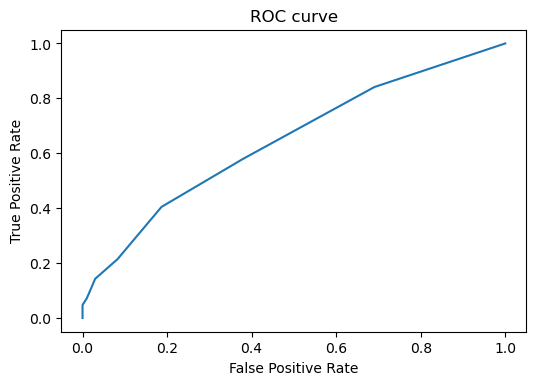

In [119]:
knn_fpr,knn_tpr,knn_thresh= roc_curve(y_test,knn_prob[:,1])
roc_auc = roc_auc_score(y_test, knn_prob[:,1])
# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(knn_fpr, knn_tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

## Ethics & Privacy

The project relies on a dataset with human subjects. The dataset is publically available with the conscents of all test subjects for non-commercial use. All data are removed of personally identifiable information (PII). The only distinguishable feature of each sample is its patient ID, which is untraceable to its PII. All data can be deleted from the Github repository after the final report is genereted if the need arises.

We will be mindful of and try to ensure that no prior knowledge or conceivable personal biases are injected into the models that we will be training over this dataset. We will also try to ensure that we only extract features from the datasets that are not obviously discriminatory to people of any gender, racial, cultural, social, or political groups.

One limitation to this study is that this dataset comes from one town in the state of Massachusetts, so the result cannot be generalized very well to any other part of the world or within the United States. We will talk about this shortcoming in the final report.

## Team Expectations 

* The team will meet every week in which any "check point" for the project is due. The meeting time is temporarily set at 4:00 pm on Wendesday.
* The team will divide work when necessary for each check point of the project, but will present the project (if necessary) together
* The team will communicate primarily on Discord, and will report status of their part of the work if necessary
* Every component that each team member is responsible of should be completed 12 hours before the actual deadline for fine-tuning.

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  1 PM |  (In-person) Discuss Project Proposal  | Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/24  |  1 PM |  Project Proposal DUE  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/27  |  4 PM |  (In-person) Peer Review and Project Setup  | Do peer review projects together, discuss on dataset, dicuss project's pipeline and role assignment| 
| 5/04  |  4 PM |  (In-person) Progress Update | Discuss dataset analysis and interesting pattern, potential approaches to handle data, start on Feature Extraction & Encoding, Model Implementation
| 5/11  |  4 PM |  (In-person) Project Checkpoint | Finalize for Project Checkpoint, update progress 
| 5/13  | 10 AM  | Project Checkpoint DUE | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/17  | 4 PM  | (Discord) Project Checkpoint Peer-Review |  Do peer review together, update on project progress  |
| 5/20  | 6 PM  | Project Checkpoint peer review DUE | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/27  | 9 PM  | Meeting for Final Project | Start writing report, make modification to model and solution  |
| 6/8  | 12 PM  | Final Project and Evaluation DUE | Discuss/edit project code; Complete project |

## Footnotes 

<a name="hypertensions"></a>1.[^](#vaugham): Adam, Vaugham. (18 March 2022) County-Level Trends in Hypertension-Related Cardiovascular Disease Mortality-United States, 200 to 2019. *Journal of the American heart Association*. https://www.ahajournals.org/doi/10.1161/JAHA.121.024785<br> 
<a name="hist"></a>2.[^](#hajar): Rachel, Hajar. (18 July 2017) Risk Factors for Coronary Artery Disease: Historical Perspectives. *National Library of Medicene*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5686931/<br> 
<a name="diseaseAlg"></a>3.[^](#Tuli): Shreshth, Tuli. (15 November 2019) HealthFog: An ensemble Deep learning based Smarted Healthcare System for Automatic Diagnosis of Heart Diseases in Integrated IoT and Fog Computing Environments. *Medical Diagnosis*. https://cs.paperswithcode.com/paper/healthfog-an-ensemble-deep-learning-based/<br> 

